In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import utils as ut
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
import matplotlib as mpl
mpl.style.use('seaborn-pastel')
mpl.rcParams['font.family'] = 'DIN'
%matplotlib inline

In [2]:
df = pd.read_csv('data/house6311.csv')
df.columns = ['year', 'idx', 'state', 'dist', 'inc', 'vote_share', 'turnout', 'south']
df.turnout.replace(df.turnout.min(), np.nan, inplace=True)
df['geom_id'] = df.state.apply(lambda x: str(x).rjust(2, '0')) + df.dist.apply(lambda x: str(x).rjust(2, '0'))

In [3]:
inc_dummies = pd.get_dummies(df.inc)
inc_dummies.columns = ['inc_r', 'no_inc', 'inc_d']
df = df.merge(inc_dummies,left_index=True, right_index=True)

In [4]:
nosouth = df.query('south == 0')

In [5]:
competitive = nosouth.query('(vote_share > .05) and (vote_share < .95)')

In [6]:
designs = ut.make_designs(competitive)

/home/ljw/dissert/dev/seatsvotes/pyjudgeit/utils.py:12: UserWarning: computing redistricting from years vector
  warn('computing redistricting from years vector')


In [7]:
import fit
import abstracts as a

In [8]:
sv = a.SeatsVotes(nosouth, 
             share_col='vote_share')

/home/ljw/dissert/dev/seatsvotes/pyjudgeit/abstracts.py:25: UserWarning: checking election dataframe for `year` variable
  Warn('checking election dataframe for `year` variable')
/home/ljw/dissert/dev/seatsvotes/pyjudgeit/abstracts.py:30: UserWarning: No redistricting vector or rule provided. Using census-based redistricting
  Warn('No redistricting vector or rule provided. Using census-based redistricting')
/home/ljw/dissert/dev/seatsvotes/pyjudgeit/utils.py:12: UserWarning: computing redistricting from years vector
  warn('computing redistricting from years vector')


In [9]:
sv.fit(covariate_cols=['inc_r', 'no_inc', 'inc_d'],
                  weight_col=None)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


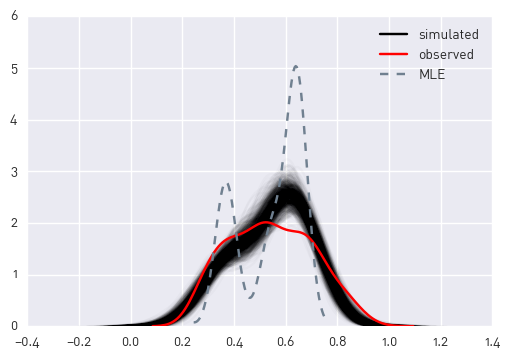

In [10]:
resample_preds = sv.predict(1000)
sns.kdeplot(np.asarray([0]*3), color='k', alpha=1, label='simulated')
for i,pred in enumerate(resample_preds):
    sns.kdeplot(pred, color='k', alpha=.02)
sns.kdeplot(sv.models[-1].model.endog, color='r', label='observed')
sns.kdeplot(sv.models[-1].predict(), color='slategrey', linestyle='--', label='MLE')

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


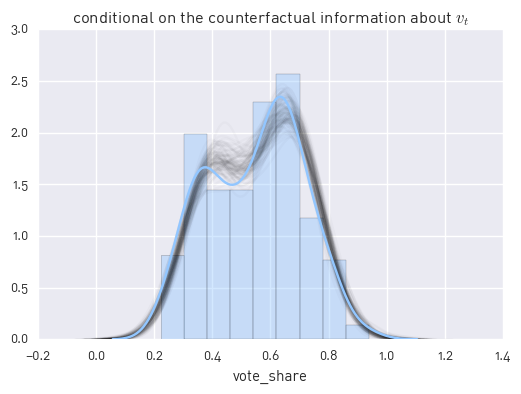

In [11]:
cfes = sv.counterfactual(n_sims=100, t=-2, swing = .02)
for elex in cfes:
    sns.kdeplot(elex, color='k', alpha=.02)
sns.distplot(sv.contested.query('year==1990').vote_share)
plt.title('conditional on the counterfactual information about $v_t$')

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


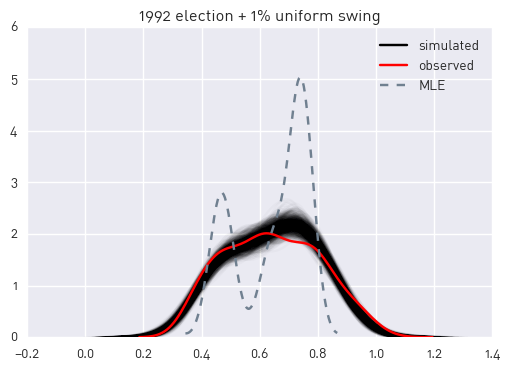

In [13]:
resample_preds = sv.counterfactual(1000, swing=.1)
sns.kdeplot(np.asarray([0]*3), color='k', alpha=1, label='simulated')
for i,pred in enumerate(resample_preds):
    sns.kdeplot(pred, color='k', alpha=.02)
sns.kdeplot(sv.models[-1].model.endog+.1, color='r', label='observed')
sns.kdeplot(sv.models[-1].predict()+.1, color='slategrey', linestyle='--', label='MLE')
plt.title('1992 election + 1% uniform swing')

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


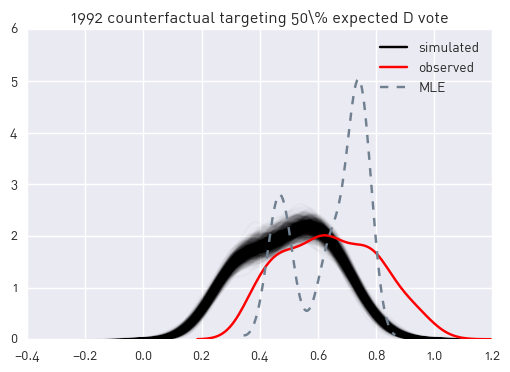

In [15]:
resample_preds = sv.counterfactual(1000, target_v=.5)
sns.kdeplot(np.asarray([0]*3), color='k', alpha=1, label='simulated')
for i,pred in enumerate(resample_preds):
    sns.kdeplot(pred, color='k', alpha=.02)
sns.kdeplot(sv.models[-1].model.endog+.1, color='r', label='observed')
sns.kdeplot(sv.models[-1].predict()+.1, color='slategrey', linestyle='--', label='MLE')
plt.title('1992 counterfactual targeting 50% expected D vote')

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


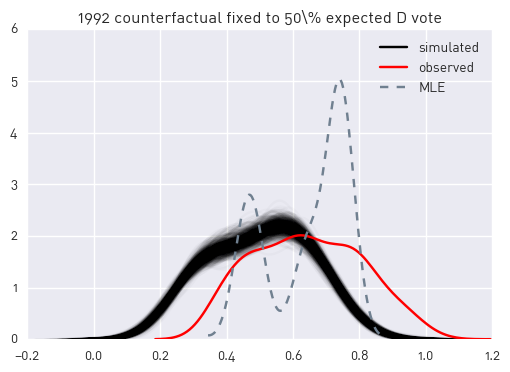

In [16]:
resample_preds = sv.counterfactual(1000, target_v=.5, fix=True)
sns.kdeplot(np.asarray([0]*3), color='k', alpha=1, label='simulated')
for i,pred in enumerate(resample_preds):
    sns.kdeplot(pred, color='k', alpha=.02)
sns.kdeplot(sv.models[-1].model.endog+.1, color='r', label='observed')
sns.kdeplot(sv.models[-1].predict()+.1, color='slategrey', linestyle='--', label='MLE')
plt.title('1992 counterfactual fixed to 50% expected D vote')

In [17]:
from tools import plurality_wins

In [18]:
year_grouper = sv.contested.query('year > 1960').groupby('year')
observed_turnouts = year_grouper.turnout.sum()
observed_contests = [np.hstack((vs.values.reshape(-1,1), 
                                1-vs.values.reshape(-1,1)))
                     *observed_turnouts[i]
                     for i,vs in year_grouper.vote_share]

In [19]:
observed_tpv = [contest.sum(axis=0)/contest.sum() 
                for contest in observed_contests]

In [20]:
plurality_shares = lambda x: (1-plurality_wins(x)).mean()

In [21]:
observed_sshare = [plurality_shares(contest) 
                     for contest in observed_contests]

In [22]:
empirical = sm.OLS(observed_sshare, sm.add_constant(np.asarray(observed_tpv).T[0])).fit()
empirical.summary()

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     70.70
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           7.64e-07
Time:                        16:19:04   Log-Likelihood:                 40.294
No. Observations:                  16   AIC:                            -76.59
Df Residuals:                      14   BIC:                            -75.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4671      0.122     -3.843      0.002        -0.728    -0.206
x1             1.9293      0.229      8.408      0.000         1.437     2.421
==============================================================================
Omnibus:                        0.903   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.707
Skew:                           0.119   Prob(JB):                        0.702
Kurtosis:                       1.998   Cond. No.                         56.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
empirical.predict([1,.5])

array([ 0.49757156])

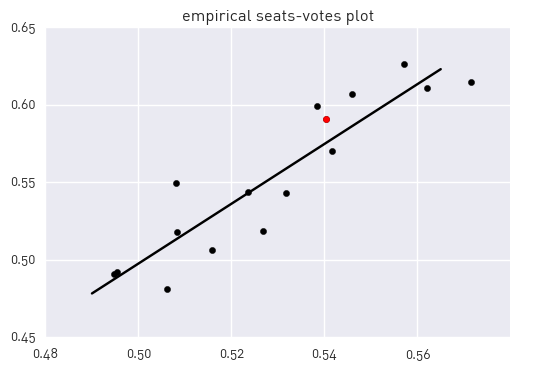

In [24]:
plt.scatter(np.asarray(observed_tpv).T[0], observed_sshare, color='k', marker='o')
plt.scatter(np.asarray(observed_tpv).T[0][-1], observed_sshare[-1], color='r', marker='o')
plt.plot((.49, .565),empirical.predict([[1,.49],[1,.565]]), color='k')
plt.axis((.48,.58,.45,.65))
plt.title('empirical seats-votes plot')

# Median Properties

In [25]:
support = np.hstack((np.linspace(.45, .5, num=10), np.linspace(.5, .55, num=10)))

In [28]:
simulation = [sv.predict(1000, target_v=i, fix=True) for i in support]

In [29]:
sim_averages = [sim.mean(axis=0) for sim in simulation]

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


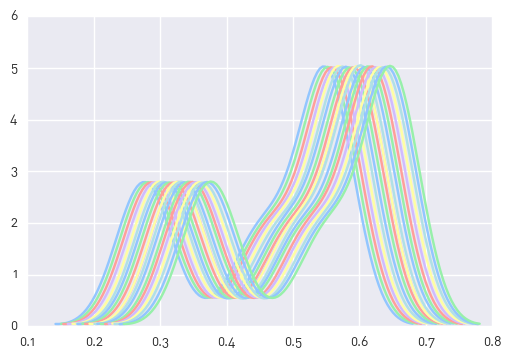

In [32]:
for av in sim_averages:
    sns.kdeplot(av)

In [51]:
seat_shares = [(sim > .5).mean(axis=1) for sim in simulation]

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


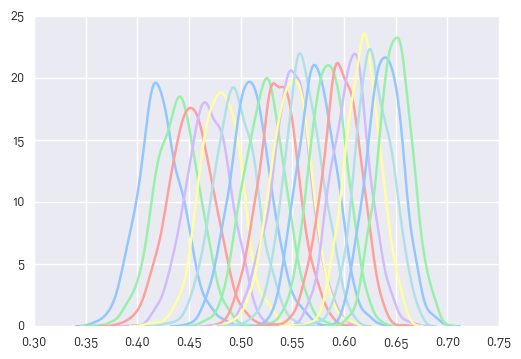

In [53]:
for ss in seat_shares:
    sns.kdeplot(ss)

In [54]:
sim_stds = [sim.std() for sim in seat_shares]

In [55]:
envelopes =[(sim.mean() +2*std, sim.mean() - 2*std) 
            for sim,std in zip(seat_shares, sim_stds)]

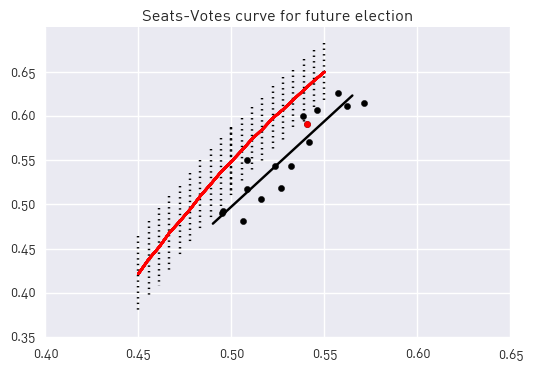

In [71]:
for si, env in zip(support, envelopes):
    plt.plot([si]*2, env, 'k:')
    plt.plot(support, [ss.mean() for ss in seat_shares], 'r-')
plt.scatter(np.asarray(observed_tpv).T[0], observed_sshare, color='k', marker='o')
plt.scatter(np.asarray(observed_tpv).T[0][-1], observed_sshare[-1], color='r', marker='o')
plt.plot((.49, .565),empirical.predict([[1,.49],[1,.565]]), color='k')
plt.axis([.40,.65,.35,.7])
plt.title('Seats-Votes curve for future elections')

In [75]:
vbart = sv.models[-1].predict().mean()
vt = sv.models[-1].model.endog.mean()

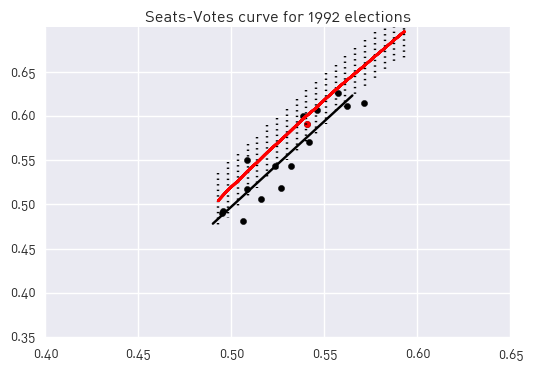

In [77]:
support = vt + np.linspace(-.05,.05,num=20)
simulation = [sv.counterfactual(1000, t=-1, target_v=i, fix=True) for i in support]
sim_averages = [sim.mean(axis=0) for sim in simulation]
seat_shares = [(sim > .5).mean(axis=1) for sim in simulation]
sim_stds = [sim.std() for sim in seat_shares]
envelopes =[(sim.mean() +2*std, sim.mean() - 2*std) 
            for sim,std in zip(seat_shares, sim_stds)]

for si, env in zip(support, envelopes):
    plt.plot([si]*2, env, 'k:')
    plt.plot(support, [ss.mean() for ss in seat_shares], 'r-')
plt.scatter(np.asarray(observed_tpv).T[0], observed_sshare, color='k', marker='o')
plt.scatter(np.asarray(observed_tpv).T[0][-1], observed_sshare[-1], color='r', marker='o')
plt.plot((.49, .565),empirical.predict([[1,.49],[1,.565]]), color='k')
plt.axis([.40,.65,.35,.7])
plt.title('Seats-Votes curve for 1992 elections')

In [81]:
def cfsimulate(k):
    vbart = sv.models[k].predict().mean()
    vt = sv.models[k].model.endog.mean()
    support = vt + np.linspace(-.05,.05,num=20)
    simulation = [sv.counterfactual(1000, t=k, target_v=i, fix=True) for i in support]
    sim_averages = [sim.mean(axis=0) for sim in simulation]
    seat_shares = [(sim > .5).mean(axis=1) for sim in simulation]
    sim_stds = [sim.std() for sim in seat_shares]
    envelopes =[(sim.mean() +2*std, sim.mean() - 2*std) 
                for sim,std in zip(seat_shares, sim_stds)]

    for si, env in zip(support, envelopes):
        plt.plot([si]*2, env, 'k:')
        plt.plot(support, [ss.mean() for ss in seat_shares], 'r-')
    plt.scatter(np.asarray(observed_tpv).T[0], observed_sshare, color='k', marker='o')
    plt.scatter(np.asarray(observed_tpv).T[0][k], observed_sshare[k], color='r', marker='o')
    plt.plot((.49, .565),empirical.predict([[1,.49],[1,.565]]), color='k')
    plt.axis([.40,.65,.35,.7])
    plt.title('Seats-Votes curve for {} elections'.format(sv._years[k]))

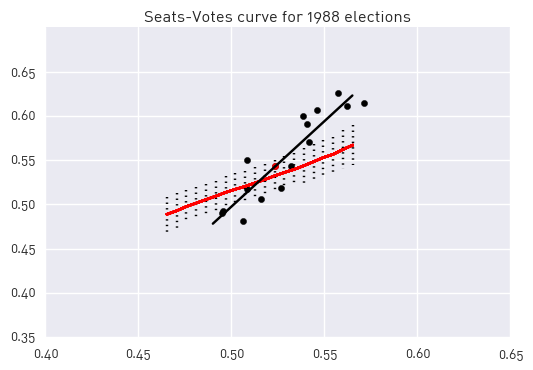

In [82]:
cfsimulate(-3)

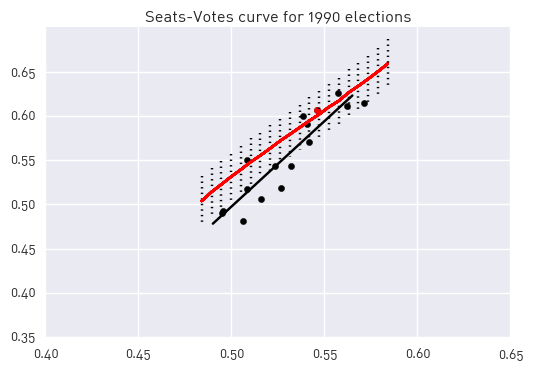

In [83]:
cfsimulate(-2)

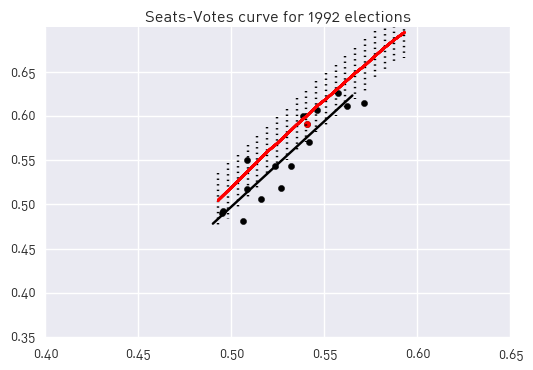

In [84]:
cfsimulate(-1)